Generalization error of ensemble: 0.020000000000000018
Average generalization error of individual trees: 0.03857000000000003


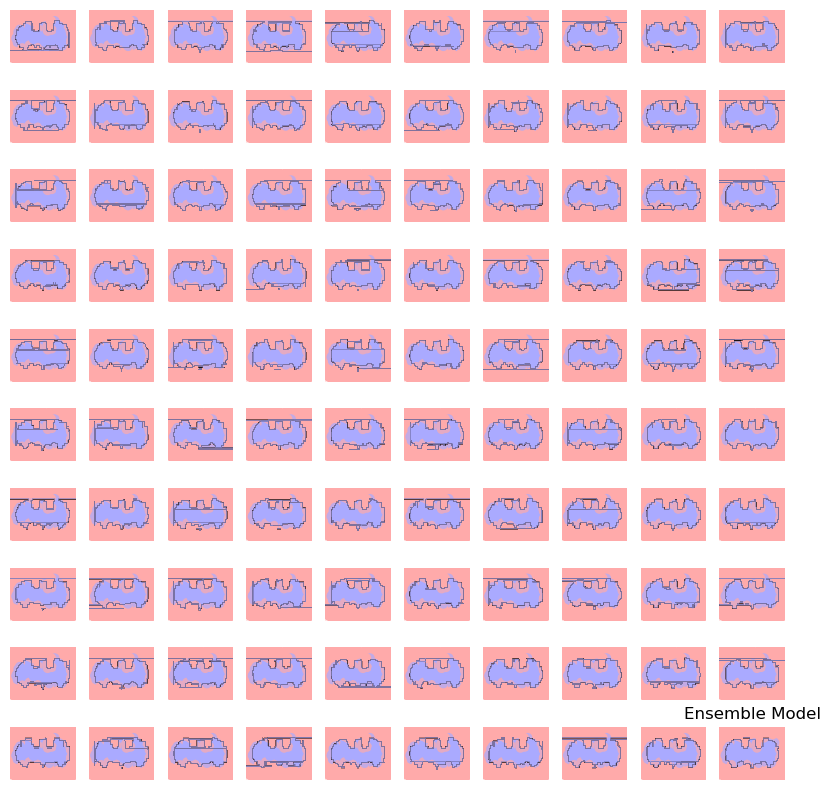

Generalization error of ensemble: 0.020000000000000018
Average generalization error of individual trees: 0.03857000000000003


In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
# Load the data from the CSV file
data = pd.read_csv("bm.csv", names=['x', 'y', 'job'])
X = data[['x', 'y']].values
y = data['job'].values

# Split data into training and test sets
np.random.seed(42)
idx = np.random.permutation(len(X))
train_idx, test_idx = idx[:9000], idx[9000:]
X_train, y_train = X[train_idx], y[train_idx]
X_test, y_test = X[test_idx], y[test_idx]

# Construct 100 decision trees using bootstrap
rng = np.random.default_rng()
n = 5000
r = np.zeros([n, 100], dtype=int)
XX = np.zeros([n, 2, 100])

for i in range(100):
    r[:, i] = rng.choice(n, size=n, replace=True)
    XX[:, :, i] = X_train[r[:, i], :]

# Train decision trees
trees = []
for i in range(100):
    tree = DecisionTreeClassifier()
    tree.fit(XX[:, :, i], y_train[r[:, i]])
    trees.append(tree)

# Make predictions using the ensemble of decision trees
individual_predictions = np.zeros((len(y_test), 100))
for i, tree in enumerate(trees):
    y_pred = tree.predict(X_test)
    individual_predictions[:, i] = y_pred

ensemble_predictions = np.sum(individual_predictions, axis=1) > 50

# Calculate generalization error of the ensemble
generalization_error = 1 - accuracy_score(y_test, ensemble_predictions)
print(f"Generalization error of ensemble: {generalization_error}")

# Calculate average generalization error of individual decision trees
avg_generalization_error = np.mean([1 - accuracy_score(y_test, individual_predictions[:, i]) for i in range(100)])
print(f"Average generalization error of individual trees: {avg_generalization_error}")

# Set the range for the meshgrid
h = 0.05
x_min, x_max = X_test[:, 0].min() - 0.5, X_test[:, 0].max() + 0.5
y_min, y_max = X_test[:, 1].min() - 0.5, X_test[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot decision boundaries of all models and ensemble
plt.figure(figsize=(10, 10))

# Set colormap
cmap = ListedColormap(['#FFAAAA', '#000000', '#AAAAFF'])

# Plot decision boundaries for all 100 decision trees
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap)
    Z = trees[i].predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=.3, cmap=cmap)
    plt.axis("off")



# Plot decision boundaries for the ensemble model
plt.subplot(10, 10, 100)
plt.scatter(X_test[:, 0], X_test[:, 1], c=ensemble_predictions, cmap=cmap)
plt.contourf(xx, yy, Z, alpha=.3, cmap=cmap)
plt.title("Ensemble Model")
plt.axis("off")


# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Display the plot
plt.show()